In [252]:
pip install sopy_fem
from sopy_fem.sopy_fem_run import sopy_fem_run
from sopy_fem.sopy_fem_help import sopy_fem_help
import json
import math
import numpy as np

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**a) Mechanical problem: Conical concrete column clamped in the bottom end**

In [260]:
sopy_fem_help('mechanics_BR02',outputFile='mechanics_bars.json')

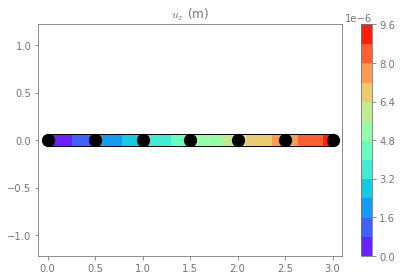

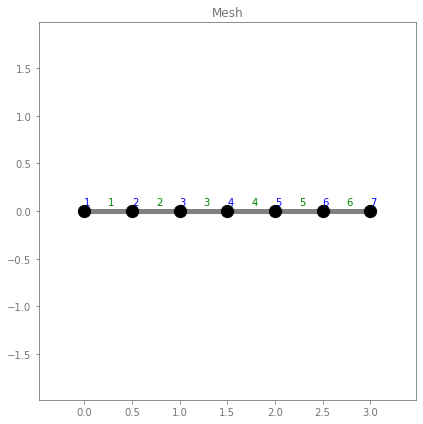

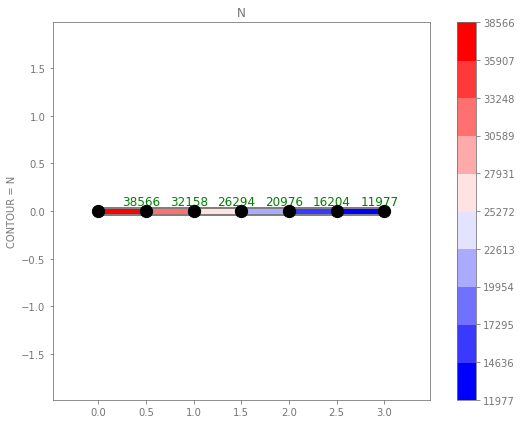

In [261]:
filename = 'mechanics_bars.json'
with open(filename, "r") as jsonFile:
    data = json.load(jsonFile)
n_nodes = 7
n_elements = n_nodes-1
n_materials = n_elements
l = 3
dictlist = [dict() for x in range(n_nodes)]
data["Mesh"]["Nodes"]=dictlist
for i in range(n_nodes):
  data["Mesh"]["Nodes"][i]["x"]=(l/(n_nodes-1))*i
  data["Mesh"]["Nodes"][i]["y"]=0.0

dictlist = [dict() for y in range(n_elements)]
data["Mesh"]["Elements"]=dictlist
dictlist1 = [dict() for y in range(n_elements)]
data["Loads"]["Line_Loads"]=dictlist1
e1=0
e2=1
for j in range(n_elements):
  e1=e1+1
  e2=e2+1
  data["Mesh"]["Elements"][j]["Connectivities"]=[e1, e2]
  data["Mesh"]["Elements"][j]["MaterialId"]=j+1
  data["Loads"]["Line_Loads"][j]["Node_ini"] = e1
  data["Loads"]["Line_Loads"][j]["Node_end"] = e2

dictlist = [dict() for z in range(n_materials)]
data["Materials"]=dictlist
e1=0
e2=1
area =np.zeros(n_materials)
for k in range(n_materials):
  data["Materials"][k]["Young"]=30000000000.0
  r1=0.25-(0.125/3)*data["Mesh"]["Nodes"][e1]["x"]
  r2=0.25-(0.125/3)*data["Mesh"]["Nodes"][e2]["x"]
  area[k]=math.pi*((r1+r2/2)**2)
  data["Materials"][k]["Area"]=area[k]
  data["Loads"]["Line_Loads"][k]["qx"] = math.pi*25000*(r1+r2+0.25*0.125)/3
  e1=e1+1
  e2=e2+1

data["Loads"]["Point_Loads"][0]["Node"] = n_nodes
data["Loads"]["Point_Loads"][0]["Values"] = [10000.0]

with open(filename, "w") as jsonFile:
    json.dump(data, jsonFile)
    
sopy_fem_run('mechanics_bars.json')

**b) Heat transfer problem: Insulation wall**

In [279]:
sopy_fem_help('thermal_BR02',outputFile='thermal_BR02.json')

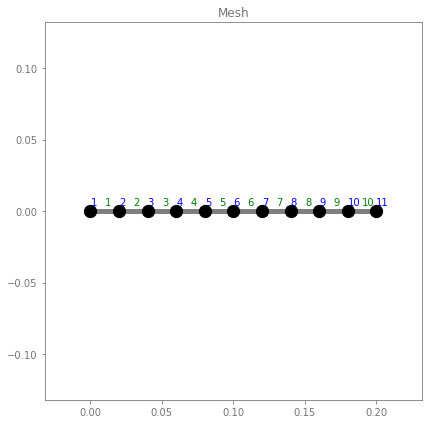

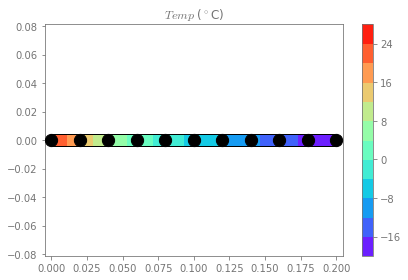

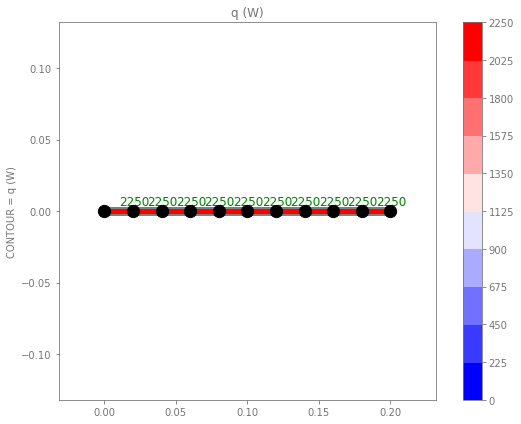

In [263]:
filename = 'thermal_BR02.json'

with open(filename, "r") as jsonFile:
    data = json.load(jsonFile)

n_nodes = 11
n_elements = n_nodes-1
n_materials = n_elements
l = 0.2
dictlist = [dict() for x in range(n_nodes)]
data["Mesh"]["Nodes"]=dictlist
for i in range(n_nodes):
  data["Mesh"]["Nodes"][i]["x"]=(l/(n_nodes-1))*i
  data["Mesh"]["Nodes"][i]["y"]=0.0

dictlist = [dict() for y in range(n_elements)]
data["Mesh"]["Elements"]=dictlist
dictlist1 = [dict() for y in range(n_elements)]
e1=0
e2=1
for j in range(n_elements):
  e1=e1+1
  e2=e2+1
  data["Mesh"]["Elements"][j]["Connectivities"]=[e1, e2]
  if data["Mesh"]["Nodes"][e1]["x"]<0.05:
    data["Mesh"]["Elements"][j]["MaterialId"]=1
  elif data["Mesh"]["Nodes"][e1]["x"]<0.1:
    data["Mesh"]["Elements"][j]["MaterialId"]=2
  elif data["Mesh"]["Nodes"][e1]["x"]>=0.1:
    data["Mesh"]["Elements"][j]["MaterialId"]=3

dictlist = [dict() for z in range(3)]
data["Materials"]=dictlist
data["Materials"][0]["Thermal_Conductivity"]=5
data["Materials"][0]["Area"]=1.0
data["Materials"][1]["Thermal_Conductivity"]=10
data["Materials"][1]["Area"]=1.0
data["Materials"][2]["Thermal_Conductivity"]=15
data["Materials"][2]["Area"]=1.0

data["Constraints"][0]["Values"]=[25]
data["Constraints"][1]["Node"]=n_nodes
data["Constraints"][1]["Values"]=[-20]



with open(filename, "w") as jsonFile:
    json.dump(data, jsonFile)
    
sopy_fem_run('thermal_BR02.json')

**c) Electrical problem: Direct current circuit**

In [278]:
sopy_fem_help('electrical_BR02',outputFile='electrical_BR02.json')

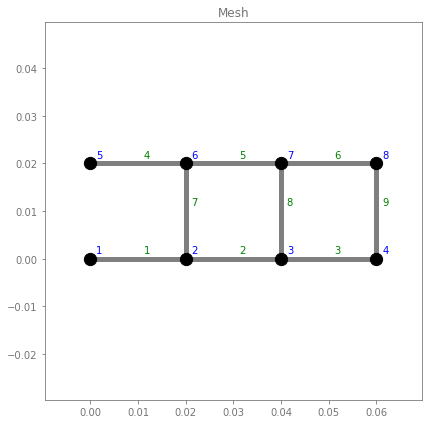

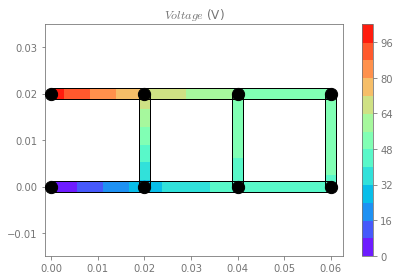

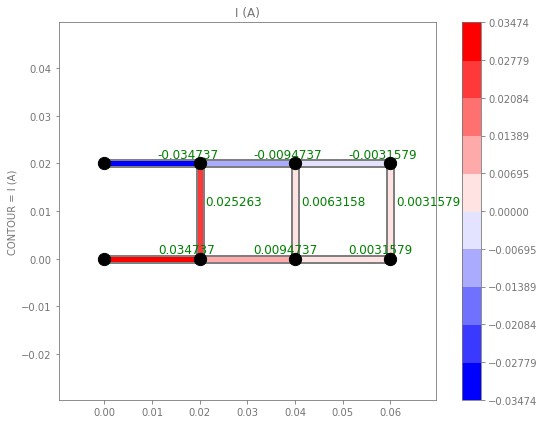

In [288]:
filename = 'electrical_BR02.json'

with open(filename, "r") as jsonFile:
    data = json.load(jsonFile)

n_nodes = 8
n_elements = 9
n_materials = 2
l = 0.02
dictlist = [dict() for x in range(n_nodes)]
data["Mesh"]["Nodes"]=dictlist
c=0
for t in range(2):
  for i in range(int(n_nodes/2)):
    data["Mesh"]["Nodes"][c]["x"]=l*i
    data["Mesh"]["Nodes"][c]["y"]=l*t
    c=c+1

dictlist = [dict() for y in range(n_elements)]
data["Mesh"]["Elements"]=dictlist
dictlist1 = [dict() for y in range(n_elements)]
e1=0
e2=1
for j in range(int(n_elements/3)):
  e1=e1+1
  e2=e2+1
  data["Mesh"]["Elements"][j]["Connectivities"]=[e1, e2]
  if e1==2 and e2==3:
    data["Mesh"]["Elements"][j]["MaterialId"]=2
  else:
    data["Mesh"]["Elements"][j]["MaterialId"]=1
  data["Mesh"]["Elements"][j+3]["Connectivities"]=[e1+4, e2+4]
  if e1+4==6 and e2+4==7:
    data["Mesh"]["Elements"][j+3]["MaterialId"]=2
  else:
    data["Mesh"]["Elements"][j+3]["MaterialId"]=1
  data["Mesh"]["Elements"][j+6]["Connectivities"]=[e1+1, e1+5]
  data["Mesh"]["Elements"][j+6]["MaterialId"]=2



dictlist = [dict() for z in range(n_materials)]
data["Materials"]=dictlist
data["Materials"][0]["Electrical_Conductivity"]=0.03
data["Materials"][0]["Area"]=0.0008
data["Materials"][1]["Electrical_Conductivity"]=0.015
data["Materials"][1]["Area"]=0.0008

data["Constraints"][0]["Values"]=[0]
data["Constraints"][1]["Node"]=5
data["Constraints"][1]["Activation"]=[5]
data["Constraints"][1]["Values"]=[100]



with open(filename, "w") as jsonFile:
    json.dump(data, jsonFile)
    
sopy_fem_run('electrical_BR02.json')

**d) Structural problem: Truss structure**

In [282]:
sopy_fem_help('structural_TRUSS02',outputFile='structural_TRUSS02.json')

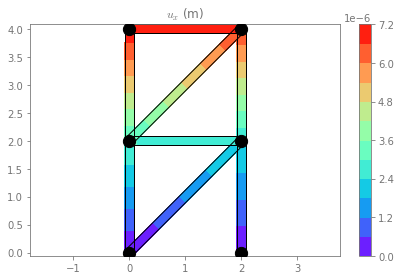

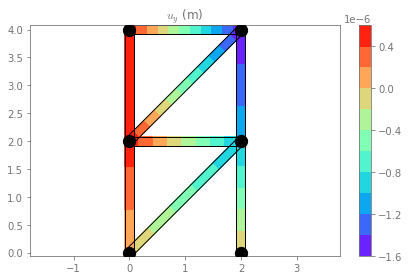

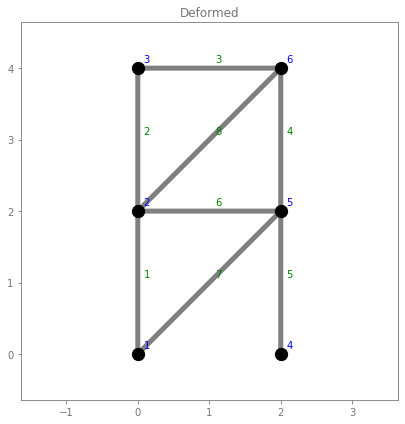

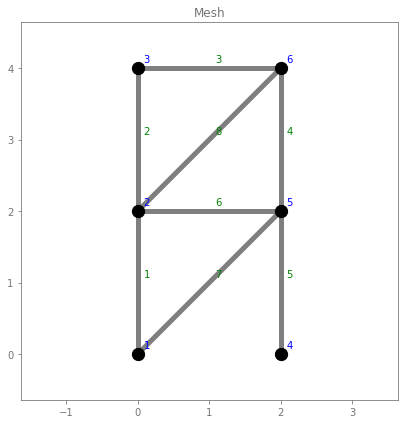

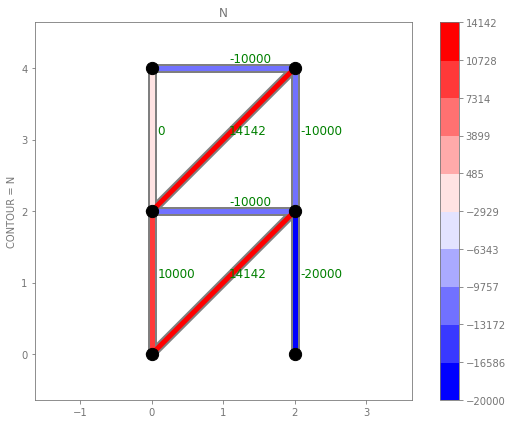

In [287]:
filename = 'structural_TRUSS02.json'

with open(filename, "r") as jsonFile:
    data = json.load(jsonFile)

n_nodes = 6
n_elements = 8
n_materials = 1
l = 2
dictlist = [dict() for x in range(n_nodes)]
data["Mesh"]["Nodes"]=dictlist
c=0
for t in range(2):
  for i in range(int(n_nodes/2)):
    data["Mesh"]["Nodes"][c]["x"]=l*t
    data["Mesh"]["Nodes"][c]["y"]=l*i
    c=c+1

dictlist = [dict() for y in range(n_elements)]
data["Mesh"]["Elements"]=dictlist
data["Mesh"]["Elements"][0]["Connectivities"]=[1, 2]
data["Mesh"]["Elements"][0]["MaterialId"]=1
data["Mesh"]["Elements"][1]["Connectivities"]=[2, 3]
data["Mesh"]["Elements"][1]["MaterialId"]=1
data["Mesh"]["Elements"][2]["Connectivities"]=[3, 6]
data["Mesh"]["Elements"][2]["MaterialId"]=1
data["Mesh"]["Elements"][3]["Connectivities"]=[6, 5]
data["Mesh"]["Elements"][3]["MaterialId"]=1
data["Mesh"]["Elements"][4]["Connectivities"]=[4, 5]
data["Mesh"]["Elements"][4]["MaterialId"]=1
data["Mesh"]["Elements"][5]["Connectivities"]=[5, 2]
data["Mesh"]["Elements"][5]["MaterialId"]=1
data["Mesh"]["Elements"][6]["Connectivities"]=[1, 5]
data["Mesh"]["Elements"][6]["MaterialId"]=1
data["Mesh"]["Elements"][7]["Connectivities"]=[6, 2]
data["Mesh"]["Elements"][7]["MaterialId"]=1

dictlist = [dict() for z in range(n_materials)]
data["Materials"]=dictlist
data["Materials"][0]["Young"]=2.1e11
data["Materials"][0]["Density"]=7800
data["Materials"][0]["Area"]=0.183

data["Constraints"][0]["Node"]=1

data["Constraints"][1]["Node"]=4

data["Loads"]["Point_Loads"][0]["Node"]=3
data["Loads"]["Point_Loads"][0]["Values"]=[1e4, 0]

with open(filename, "w") as jsonFile:
    json.dump(data, jsonFile)
    
sopy_fem_run('structural_TRUSS02.json')